In [202]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [203]:
torch.__version__

'2.0.1+cpu'

## 1. Data Preparation

In ML, data should be presented numerical values.

In [204]:
def linear_regression(X, w, b):
    return w * X + b

w = 3.4
b = 2

X = torch.arange(1, 20, 0.1).unsqueeze(dim=1) # Converts a row-vector into a column-vector
y = linear_regression(X, w, b)

In [205]:
print(f'Shape of X: {X.shape}, Shape of y: {y.shape}')

Shape of X: torch.Size([190, 1]), Shape of y: torch.Size([190, 1])


In [206]:
print(f'X: {X[:10]}, y: {y[:10]}')

X: tensor([[1.0000],
        [1.1000],
        [1.2000],
        [1.3000],
        [1.4000],
        [1.5000],
        [1.6000],
        [1.7000],
        [1.8000],
        [1.9000]]), y: tensor([[5.4000],
        [5.7400],
        [6.0800],
        [6.4200],
        [6.7600],
        [7.1000],
        [7.4400],
        [7.7800],
        [8.1200],
        [8.4600]])


In [207]:
training_split = 0.8
training_size = int(len(X) * training_split)
X_train, X_test, y_train, y_test = X[:training_size], X[training_size:], y[:training_size], y[training_size:]

In [208]:
print(f'Training split: {len(X_train)}, Test split: {len(X_test)}')

Training split: 152, Test split: 38


In [209]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None):
    plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train, c='b', s=5, label='Training Set')
    plt.scatter(X_test, y_test, c='r', s=5, label='Predictions')

    if predictions is not None:
        plt.scatter(X_test, predictions, c='green', s=5, label='Predictions on Test Set')

    plt.legend(prop={
        'size': 14
    })

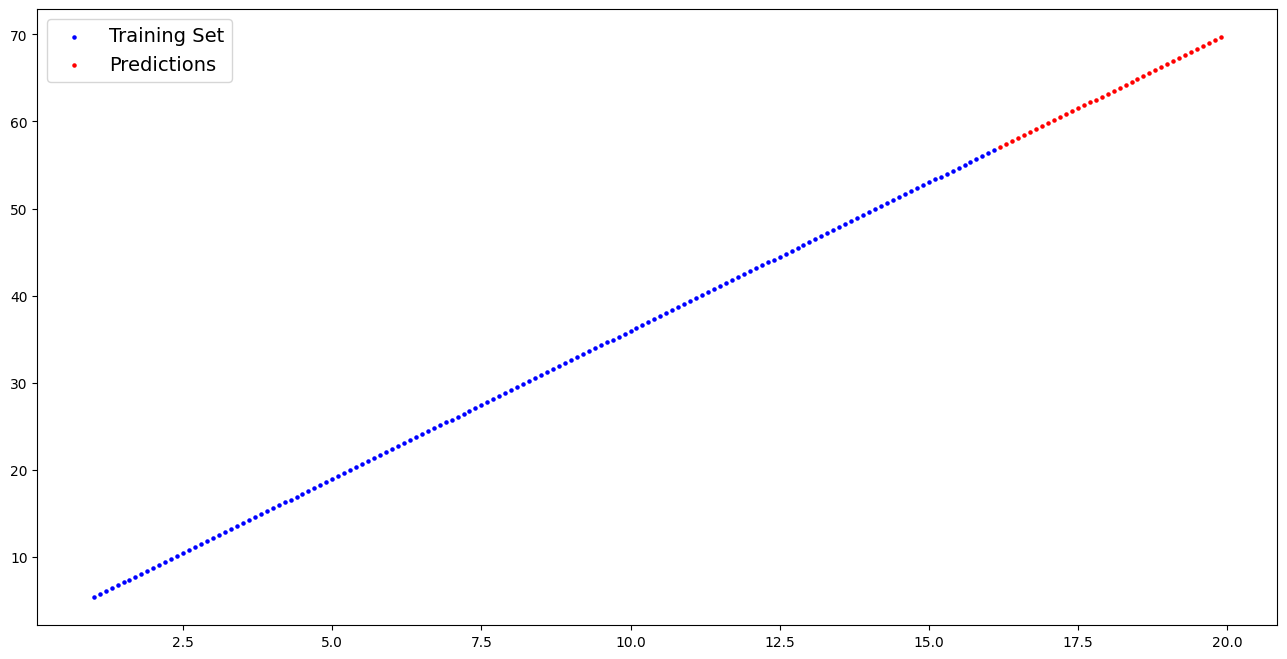

In [210]:
plot_predictions(X_train, y_train, X_test, y_test)

In [211]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                    requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float),
                                 requires_grad=True)


    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * X + self.bias

In [212]:
torch.manual_seed(816)

model_0 = LinearRegressionModel()

print(f'Model\'s parameters are: {list(model_0.parameters())}')

Model's parameters are: [Parameter containing:
tensor([-0.1659], requires_grad=True), Parameter containing:
tensor([-0.3889], requires_grad=True)]


In [213]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.1659])), ('bias', tensor([-0.3889]))])

Predictions made by initial random parameters

In [214]:
with torch.inference_mode():
    y_pred = model_0(X_test)

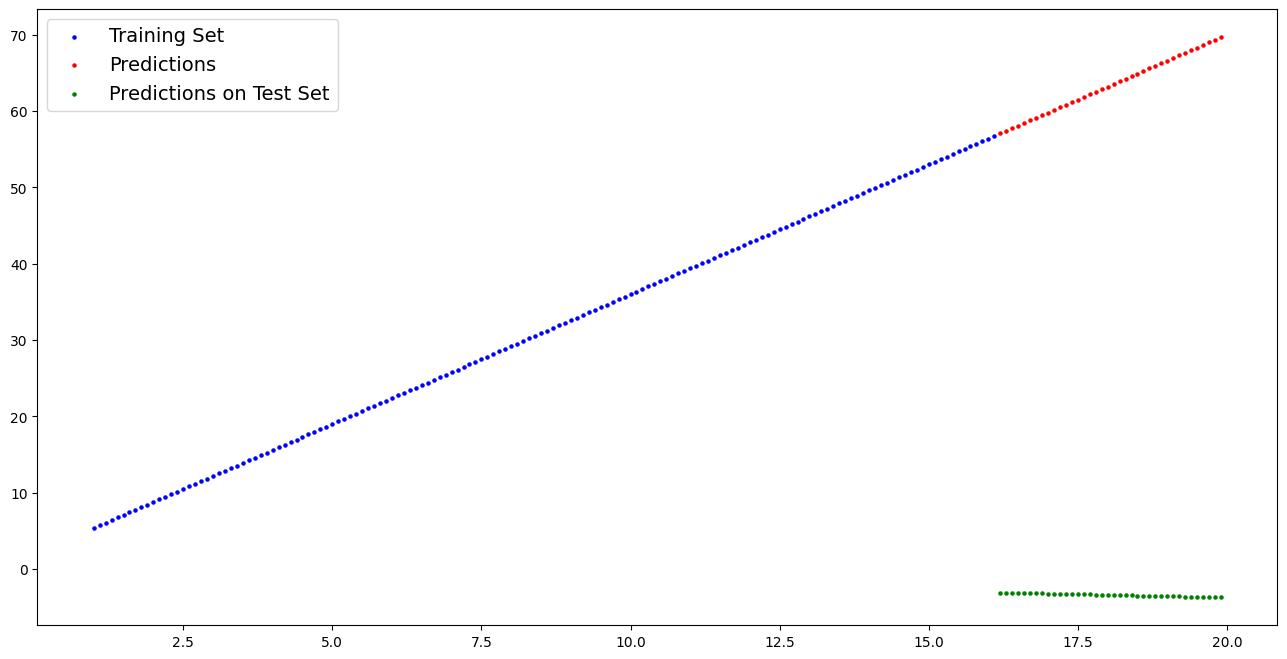

In [215]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Model Training

In [216]:
loss_func = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [217]:
torch.manual_seed(816)

epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ## Training

    # Set model to training mode
    model_0.train()

    # 1. Forward pass the training data
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_func(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ## TEST
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass the test data
        y_pred = model_0(X_test)

        # 2. Calculate the loss on test
        test_loss = loss_func(y_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f'Epoch: {epoch},'
                  f'MAE Train Loss: {loss},'
                  f'MAE Test Loss: {test_loss}')



Epoch: 0,MAE Train Loss: 32.87711715698242,MAE Test Loss: 65.19966888427734
Epoch: 10,MAE Train Loss: 25.46686363220215,MAE Test Loss: 49.66691207885742
Epoch: 20,MAE Train Loss: 18.056615829467773,MAE Test Loss: 34.1341667175293
Epoch: 30,MAE Train Loss: 10.64636516571045,MAE Test Loss: 18.60141372680664
Epoch: 40,MAE Train Loss: 3.2361156940460205,MAE Test Loss: 3.068662643432617
Epoch: 50,MAE Train Loss: 0.7332580089569092,MAE Test Loss: 1.1193383932113647
Epoch: 60,MAE Train Loss: 0.7188941836357117,MAE Test Loss: 1.1043716669082642
Epoch: 70,MAE Train Loss: 0.7045451998710632,MAE Test Loss: 1.0621987581253052
Epoch: 80,MAE Train Loss: 0.6902406811714172,MAE Test Loss: 1.0472338199615479
Epoch: 90,MAE Train Loss: 0.6758779287338257,MAE Test Loss: 1.032263159751892
Epoch: 100,MAE Train Loss: 0.6615141034126282,MAE Test Loss: 1.017296314239502
Epoch: 110,MAE Train Loss: 0.6471730470657349,MAE Test Loss: 0.9751271605491638
Epoch: 120,MAE Train Loss: 0.6328606009483337,MAE Test Loss: 0

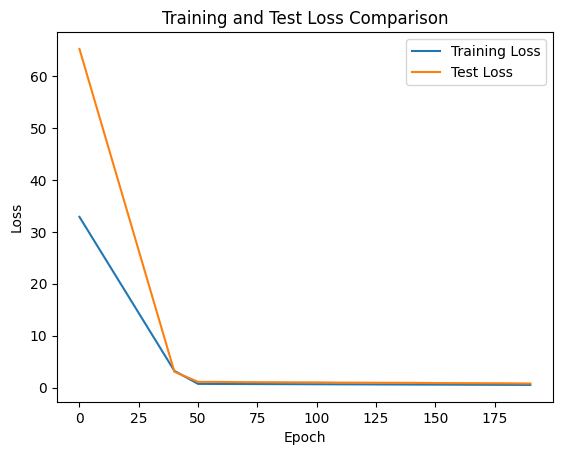

In [218]:
plt.plot(epoch_count, train_loss_values, label='Training Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')

plt.title('Training and Test Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

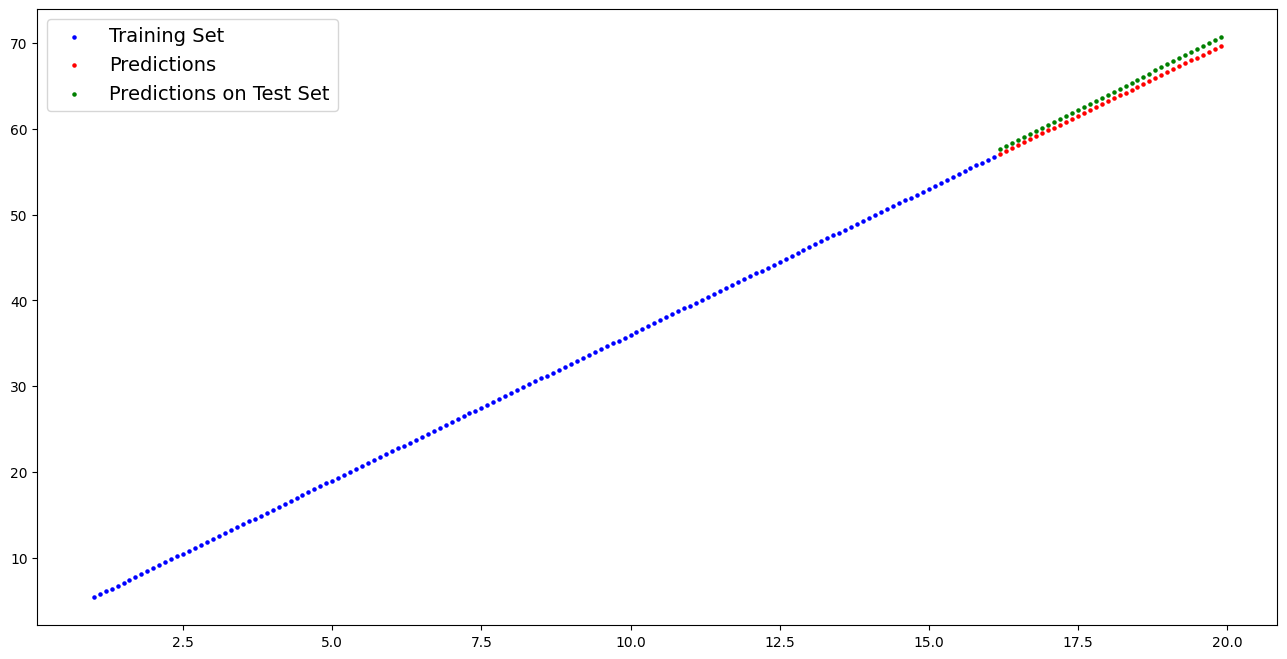

In [219]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [220]:
print(f'The model learned the follwoing values for weights and biases: {model_0.state_dict()}')

The model learned the follwoing values for weights and biases: OrderedDict([('weight', tensor([3.5187])), ('bias', tensor([0.6373]))])


There are 3 things to remember when making predictions:
1. Set the model in evaluation model
2. Make predictions using the inference_mode context manager
3. ALl predictions should be made with objects on the same device

In [221]:
model_0.state_dict()

OrderedDict([('weight', tensor([3.5187])), ('bias', tensor([0.6373]))])

### Saving a model

In [222]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model_0.pth
